# Single Layer Feedforward Neural Network (SLFNN)

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import scipy.io

import pathlib
import os

In [2]:
home_dir = pathlib.Path("/c/Users/thsiao3/Documents/emory_class/MATH789/hw4/")
data_dir = home_dir / "PeaksClassification.mat"

In [3]:
os.chdir(home_dir)
# Custom modules. utils holds functions for the softmax and derivative Test. 
import SLFN
import utils

Setting up datasets

In [4]:
Y = scipy.io.loadmat(data_dir)
Ytrain = Y['Ytrain']
Ytest = Y['Ytest']
Ctrain = Y['Ctrain']
Ctest = Y['Ctest']

## Test Derivatives

Set up a test single layer NN

In [5]:
m = 5
n_f, n = Ytrain.shape
n_c = Ctrain.shape[0]

K = np.random.randn(m, n_f)
W = np.random.randn(n_c, m)
b = 10 * np.ones((m, 1))

x = np.vstack((np.reshape(K, (-1, 1)), b, np.reshape(W, (-1, 1))))
D = np.random.randn(x.shape[0], 1)

In [6]:
model = SLFN.SLFN(Ytrain, Ctrain, m, np.tanh)

Define functions needed to pass to scipy.optimize. Loss and Jacobian

In [7]:
h = np.array([2e-10, 2e-8, 2e-7, 2e-6, 2e-5, 2e-4, 2e-3, 2e-1, 1])
d1, d2 = utils.derivativeTest(model.objective, model.gradient, h, x, D)

Text(0, 0.5, '$\\log(\\Delta E)$')

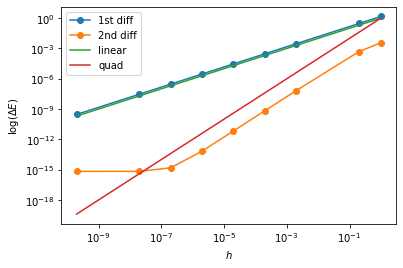

In [8]:
plt.plot(h, abs(d1), marker="o", label="1st diff")
plt.plot(h, abs(d2), marker="o", label="2nd diff")
plt.plot(h, h, label="linear")
plt.plot(h, h**2, label="quad")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$h$")
plt.ylabel("$\log(\Delta E)$")

The second order difference has a slope close to 2, showing that the computed gradient is close to correct. 

# Solving Optimization

Set up the single layer model for use with scipy

In [41]:
m = 30
n_f, n = Ytrain.shape
n_c = Ctrain.shape[0]

K = np.random.randn(m, n_f)
W = np.random.randn(n_c, m)
b = np.zeros((m, 1))

x = np.vstack((np.reshape(K, (-1, 1)), b, np.reshape(W, (-1, 1))))

In [42]:
model = SLFN.SLFN(Ytrain, Ctrain, m, np.tanh)

In [43]:
model.fit(method="BFGS", x0=x, options={'maxiter': 100}, use_wrapper=False)

In [44]:
print("Training Accuracy: {}".format(np.mean(model.predict(Ytrain) == np.argmax(Ctrain, 0))))
print("Testing Accuracy: {}".format(np.mean(model.predict(Ytest) == np.argmax(Ctest, 0))))

Training Accuracy: 0.9705
Testing Accuracy: 0.962


In [45]:
# Model Preds grid
x = np.arange(-3,3.1,.05)
y = np.arange(-3,3.1,.05)
Grid = np.array([np.array([a, b]) for a in x for b in y]).T
preds = model.predict(Grid)

[]

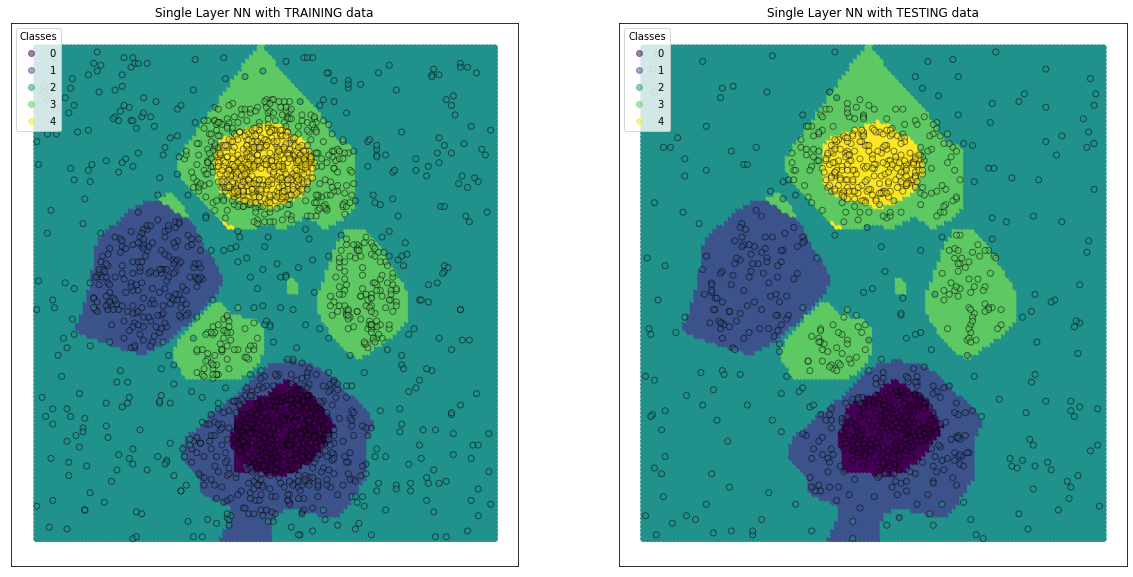

In [46]:
colors = np.argmax(Ctrain, 0)
fig, ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
ax[0].scatter(Grid[0], Grid[1], c=preds)
ax[0].set_title("Single Layer NN with TRAINING data")
scatter = ax[0].scatter(Ytrain[0], Ytrain[1], c=colors, alpha=0.5, edgecolors='black')
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax[0].set_xticks([])
ax[0].set_yticks([])
colors = np.argmax(Ctest, 0)
ax[1].scatter(Grid[0], Grid[1], c=preds)
ax[1].set_title("Single Layer NN with TESTING data")
scatter = ax[1].scatter(Ytest[0], Ytest[1], c=colors, alpha=0.5, edgecolors='black')
legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax[1].set_xticks([])
ax[1].set_yticks([])